# List of empirical facts

1. Fact group 0: `splitnet_posenc__enc=128` beats `siren_baseline` on cameraman

# Fact group 0

Questions:

1. Is there a setup where splitnet is better?

Yes.

[splitnet](https://wandb.ai/kilianovski/01_splitnet__cameraman/runs/2m0bmqpi) vs [siren](https://wandb.ai/kilianovski/01_splitnet__cameraman/runs/vbqf3o9u?workspace=user-kilianovski)

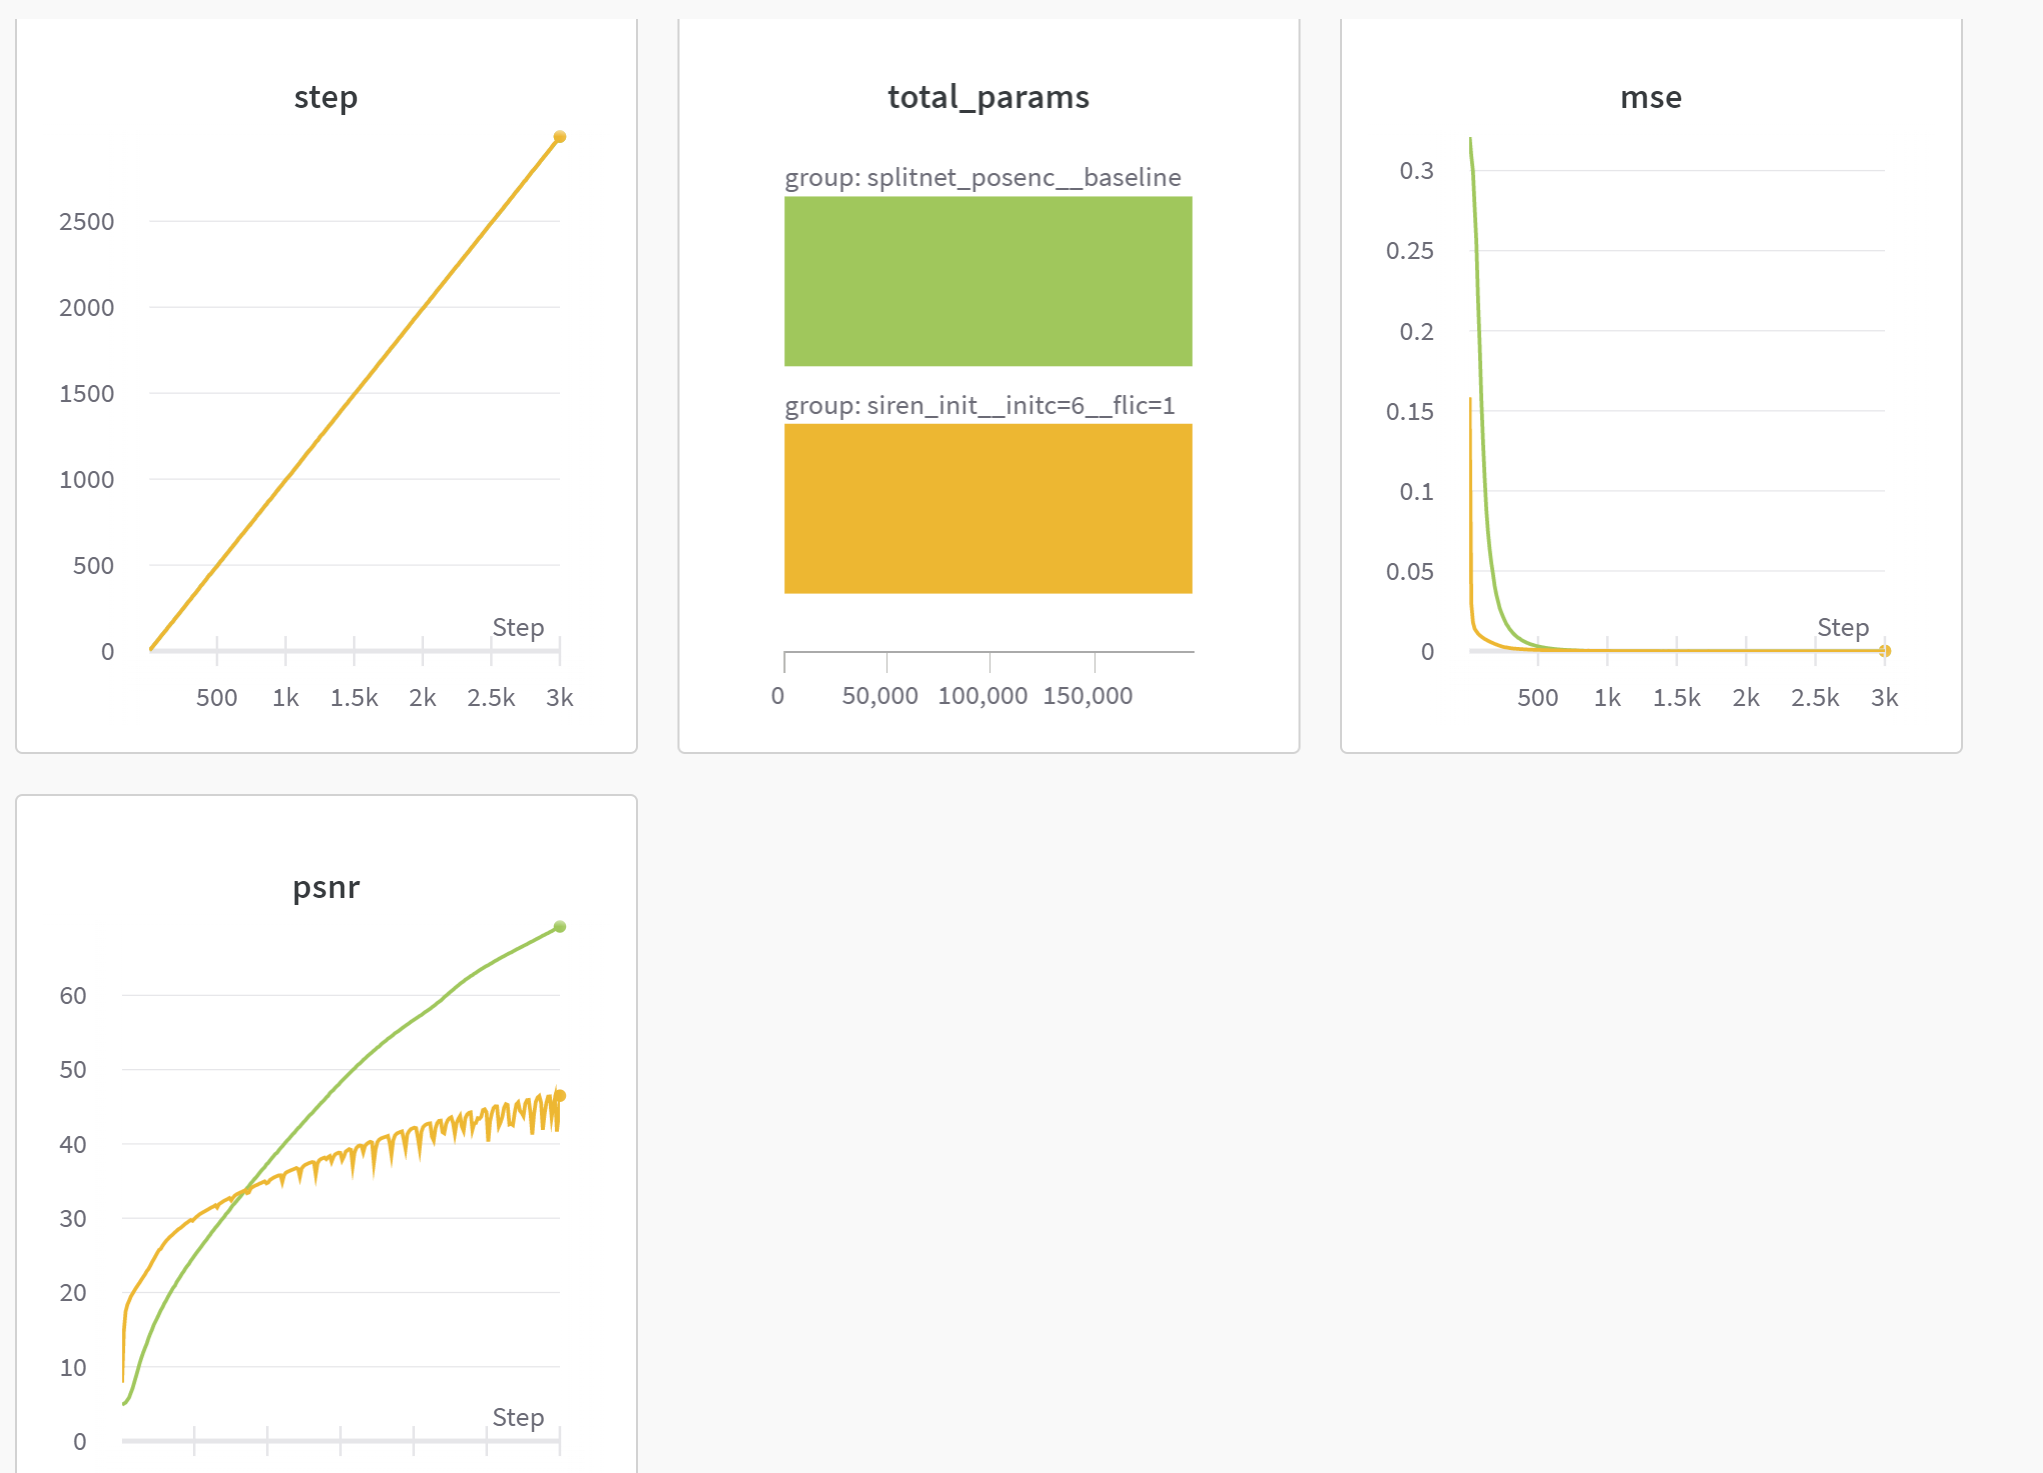

2. Does the same net setup works better on color image?



## Setup code

In [1]:
from train_pipeline import train

import os
import torch
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf


def load_cfg(overrides=()):
    # with initialize_config_dir(config_dir="/app/notebooks/draft_02/conf"):
    with initialize(version_base=None, config_path="./conf"):
        cfg = compose(config_name='config', overrides=list(overrides))
        return cfg

from IPython.display import clear_output

## Experiments code

image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.siren.model.Siren
  in_features: 2
  out_features: none
  hidden_features: 256
  hidden_layers: 3
  init_c: 6
  first_layer_init_c: 1
  outermost_linear: true
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: siren_init__initc=${model.init_c}__flic=${model.first_layer_init_c}
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0

Setting seed to 0


mse,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
psnr,▁▃▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
total_params,▁
step,2999
total_params,199180


********************************************************************************


image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.siren.model.Siren
  in_features: 2
  out_features: none
  hidden_features: 256
  hidden_layers: 3
  init_c: 6
  first_layer_init_c: 1
  outermost_linear: true
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: siren_init__initc=${model.init_c}__flic=${model.first_layer_init_c}
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0


********************************************************************************
+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
| net.0.linear.weight |    512     |
|  net.0.linear.bias  |    256     |
| net.1.linear.weight |   65536  

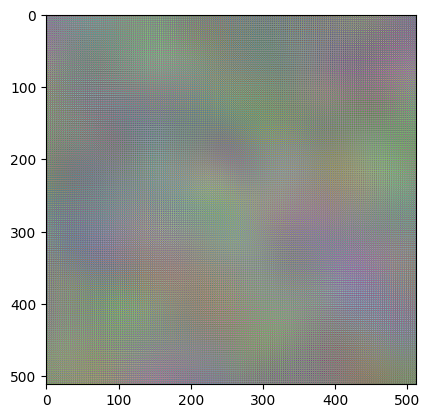

Step 500, Total loss 0.010929


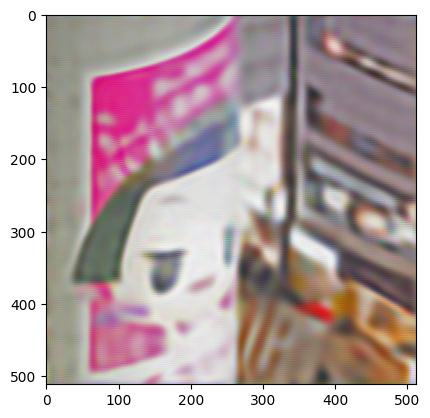

Step 1000, Total loss 0.006993


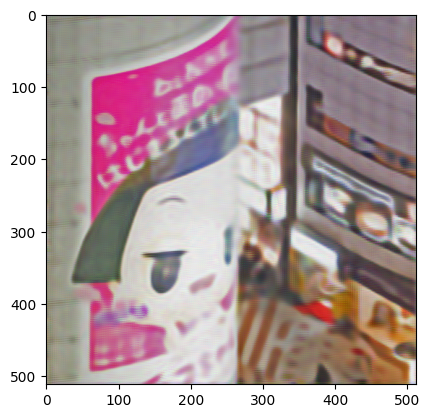

Step 1500, Total loss 0.005463


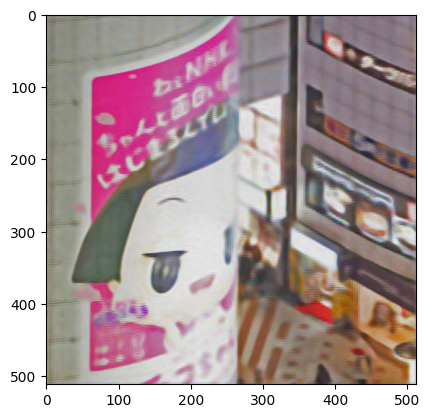

Step 2000, Total loss 0.004483


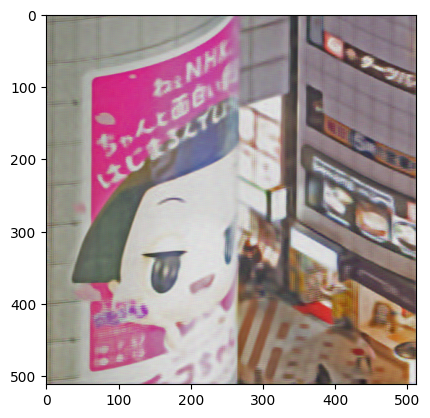

Step 2500, Total loss 0.003762


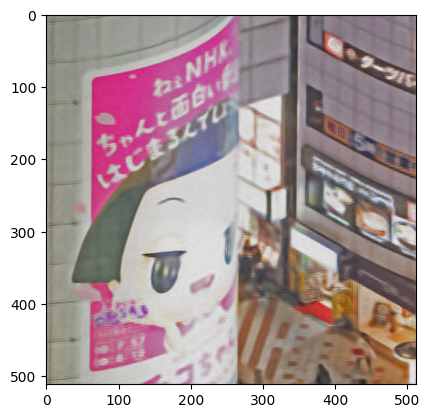

In [11]:
cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    "random_seed=[0]",
    # "image=cameraman",
    "+device=cuda:0",
])

print(OmegaConf.to_yaml(cfg))
train(cfg)

image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.parallel.ParallelSplitNet
  model_configs:
  - hidden_layers:
    - 128
    - 128
    m:
    - 10.0
    - 10.0
    - 1.0
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: splitnet_posenc__baseline
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0

Setting seed to 0


mse,█▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
psnr,▁▂▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████
step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
total_params,▁
step,2999
total_params,198915


********************************************************************************


image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.parallel.ParallelSplitNet
  model_configs:
  - hidden_layers:
    - 128
    - 128
    m:
    - 10.0
    - 10.0
    - 1.0
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: splitnet_posenc__baseline
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0


********************************************************************************
+--------------------------------+------------+
|            Modules             | Parameters |
+--------------------------------+------------+
| networks.0.net.0.linear.weight |   131072   |
|  networks.0.net.0.linear.bias  |    512     |
| networks.0.net.1.linear.weight |   65536    |
|  network

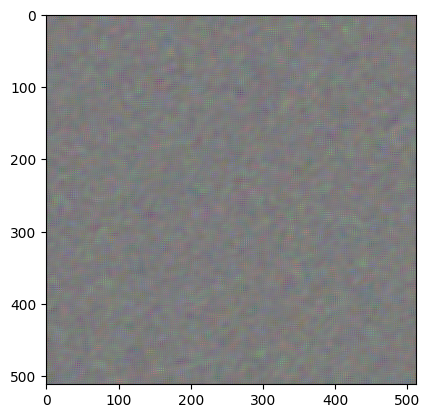

In [ ]:
cfg = load_cfg(overrides=[
    "+exp=01_splitnet_posenc",
    "random_seed=[0]",
    # "image=cameraman",
    "+device=cuda:0",
])

print(OmegaConf.to_yaml(cfg))
train(cfg)

Setting seed to 42


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kilianovski. Use `wandb login --relogin` to force relogin


********************************************************************************


image: cameraman
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 42
model:
  _target_: spellbook.splitnet.SplitNetPosEncOmegas
  in_features: 2
  encoding_size: 128
  hidden_features: 128
  hidden_layers: 1
  outermost_linear: false
  m:
  - 10.0
  - 10.0
  - 1.0
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: splitnet_posenc__enc=${model.encoding_size}
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:1


********************************************************************************


/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
| net.0.linear.weight |   131072   |
|  net.0.linear.bias  |    512     |
| net.1.linear.weight |   65536    |
|  net.1.linear.bias  |    512     |
| net.2.linear.weight |    512     |
|  net.2.linear.bias  |     4      |
+---------------------+------------+
Total Trainable Params: 198148
Step 0, Total loss 0.325383


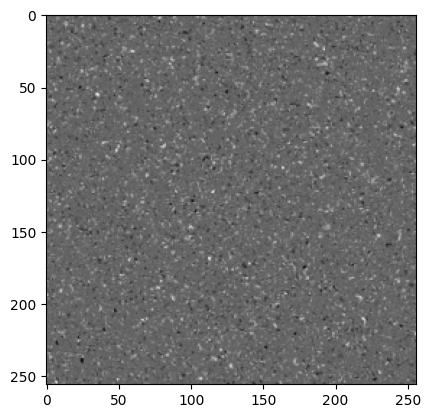

Step 500, Total loss 0.003072


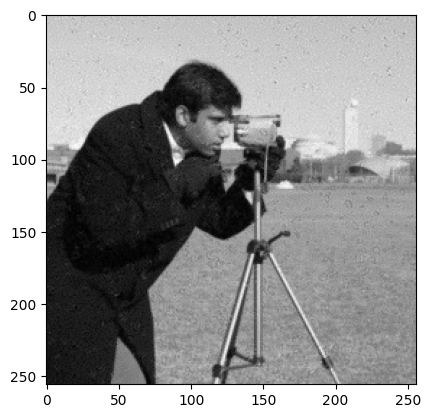

Step 1000, Total loss 0.000390


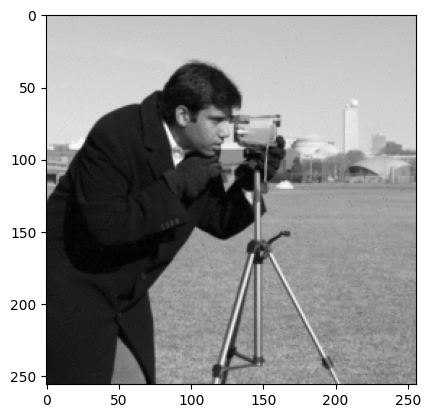

Step 1500, Total loss 0.000068


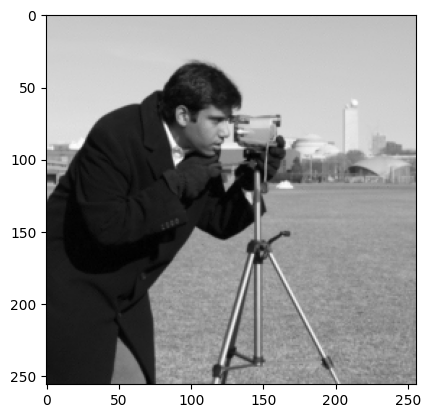

Step 2000, Total loss 0.000013


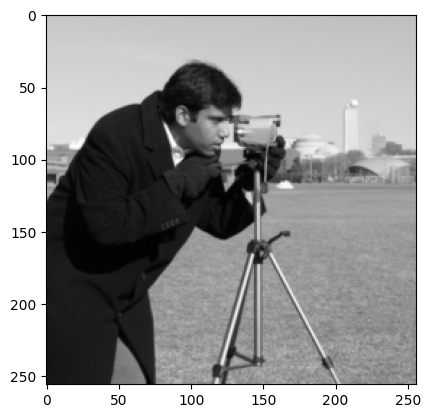

Step 2500, Total loss 0.000003


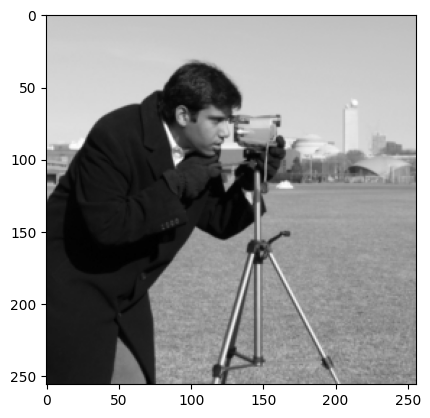

In [4]:
# old_cfg = """
# image: cameraman
# image_dir: ../../data
# image_W: 512
# use_wandb: true
# is_debug: false
# total_steps: 3000
# random_seed:
# - 42
# model:
#   _target_: spellbook.splitnet.SplitNetPosEncOmegas
#   in_features: 2
#   encoding_size: 128
#   hidden_features: 128
#   hidden_layers: 1
#   outermost_linear: false
#   m:
#   - 10.0
#   - 10.0
#   - 1.0
# logging:
#   logger:
#     _target_: spellbook.logging.wandb.WandbLogger
#     project: 01_splitnet__${image}
#   steps_till_summary: 500
#   experiment_name: splitnet_posenc__enc=${model.encoding_size}
# optimizer:
#   _target_: torch.optim.AdamW
#   weight_decay: 0.0
#   lr: 0.0001
# device: cuda:1
# """

# cfg = OmegaConf.create(old_cfg)
# # train(cfg)